# Grupo 20: Thiago e Gabriele

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.lines as mlines
from sklearn import preprocessing
from sklearn import cluster


In [66]:
df = pd.read_csv('trabalho5_dados_20.csv')

In [67]:
df.describe()

area    perimetro   maior-eixo   menor-eixo  arredondamento  \
count   1143.000000  1143.000000  1143.000000  1143.000000     1143.000000   
mean   12658.894138   454.498840   189.051254    86.121164        0.887839   
std     1744.694334    35.739101    17.554676     5.631057        0.020007   
min     8501.000000   371.024994   151.438461    67.695343        0.816083   
25%    11353.000000   425.818008   174.266548    82.645897        0.874126   
50%    12405.000000   448.839996   186.107849    86.146309        0.890264   
75%    13959.000000   483.822495   203.602448    90.012150        0.903069   
max    17856.000000   548.445984   239.010498   102.901276        0.948007   

       area-convexa     extensao  
count   1143.000000  1143.000000  
mean   12945.679790     0.658682  
std     1786.314499     0.077419  
min     8738.000000     0.497413  
25%    11615.500000     0.597611  
50%    12659.000000     0.638173  
75%    14283.000000     0.721851  
max    18062.000000     0.861050

In [68]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   area            1143 non-null   int64  
 1   perimetro       1143 non-null   float64
 2   maior-eixo      1143 non-null   float64
 3   menor-eixo      1143 non-null   float64
 4   arredondamento  1143 non-null   float64
 5   area-convexa    1143 non-null   int64  
 6   extensao        1143 non-null   float64
dtypes: float64(5), int64(2)
memory usage: 62.6 KB


Distribuição dos dados

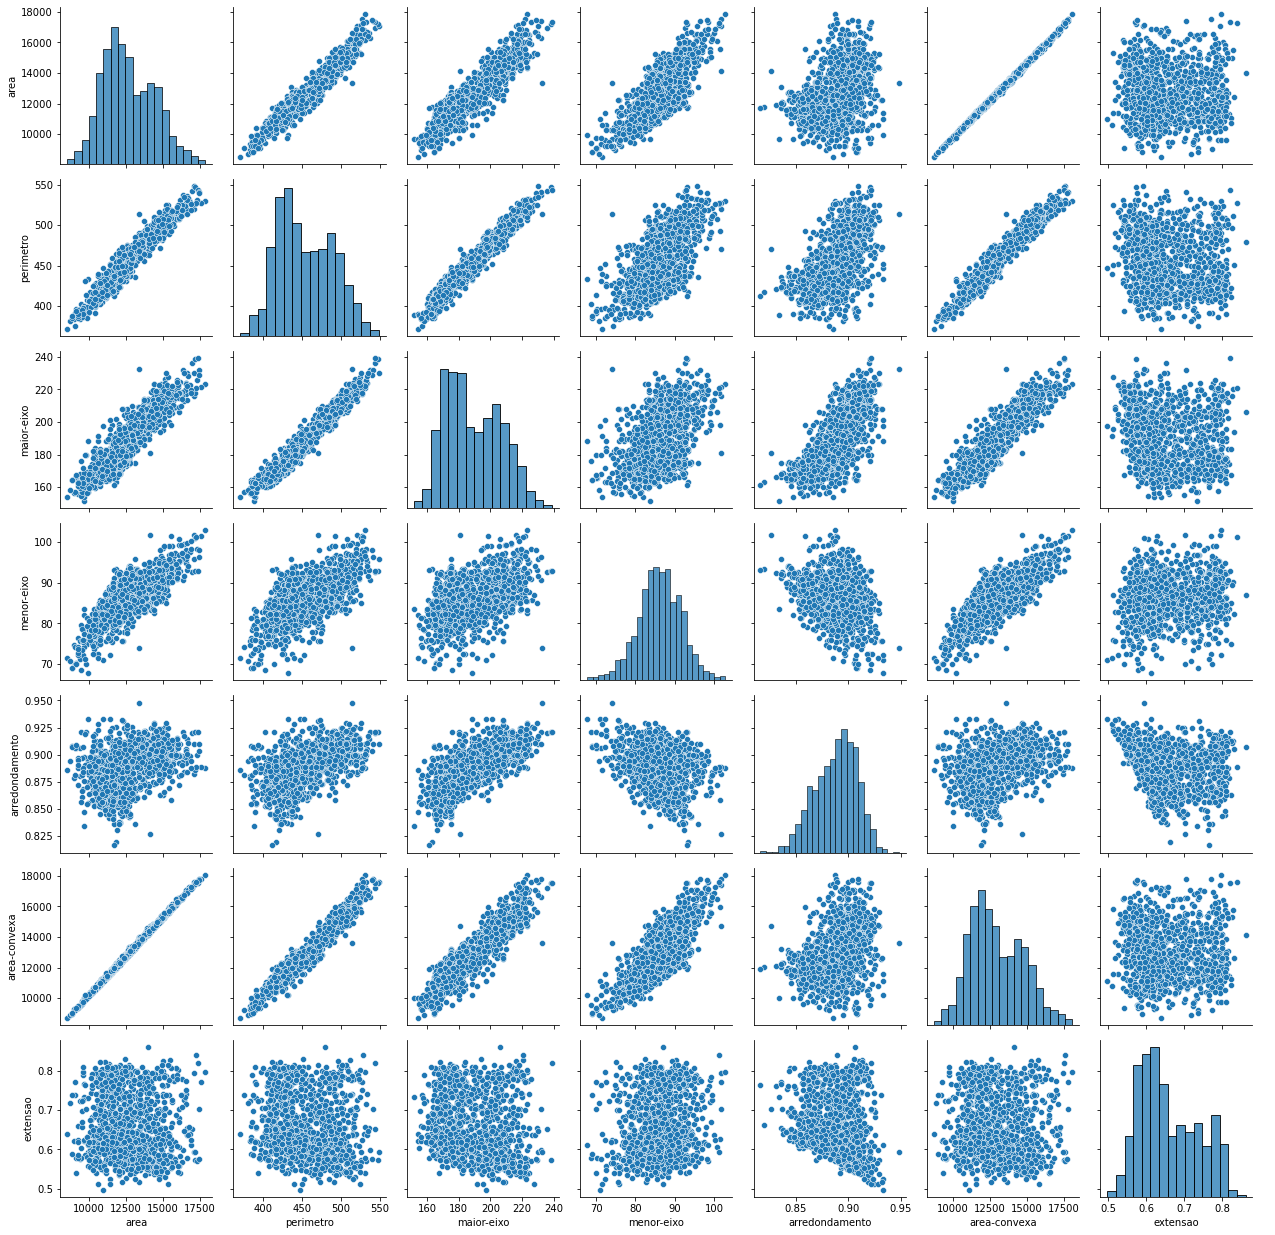

In [69]:
g = sns.PairGrid(df)
g.map_diag(sns.histplot)
g.map_offdiag(sns.scatterplot)
g.add_legend()

Correlação

In [70]:
df.corr()

area  perimetro  maior-eixo  menor-eixo  arredondamento  \
area            1.000000   0.967621    0.910016    0.797172        0.374845   
perimetro       0.967621   1.000000    0.974633    0.644938        0.561282   
maior-eixo      0.910016   0.974633    1.000000    0.480290        0.716767   
menor-eixo      0.797172   0.644938    0.480290    1.000000       -0.253445   
arredondamento  0.374845   0.561282    0.716767   -0.253445        1.000000   
area-convexa    0.998988   0.971151    0.910753    0.796271        0.376175   
extensao       -0.029267  -0.103465   -0.118685    0.098955       -0.206128   

                area-convexa  extensao  
area                0.998988 -0.029267  
perimetro           0.971151 -0.103465  
maior-eixo          0.910753 -0.118685  
menor-eixo          0.796271  0.098955  
arredondamento      0.376175 -0.206128  
area-convexa        1.000000 -0.033563  
extensao           -0.033563  1.000000

### Normalizando

In [71]:
scaler = preprocessing.MinMaxScaler( feature_range=(-1, 1) )
x_norm = scaler.fit_transform(df)

### Método Elbow

In [27]:
def calculate_WSS(points, kmax):
  sse = []
  for k in range(1, kmax+1):
    kmeans = cluster.KMeans(n_clusters = k).fit(points)
    centroids = kmeans.cluster_centers_
    pred_clusters = kmeans.predict(points)
    curr_sse = 0
    
    # calculate square of Euclidean distance of each point from its cluster center and add to current WSS
    for i in range(len(points)):
      curr_center = centroids[pred_clusters[i]]
      curr_sse += (points[i, 0] - curr_center[0]) ** 2 + (points[i, 1] - curr_center[1]) ** 2
      
    sse.append(curr_sse)
  return sse

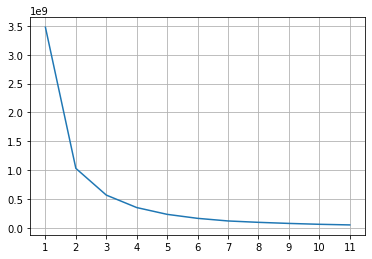

In [28]:
teste= calculate_WSS(df.values,11)
plt.plot(np.arange(1,12),teste)
plt.xticks(np.arange(1,12))
plt.grid()
plt.show()

## K-means

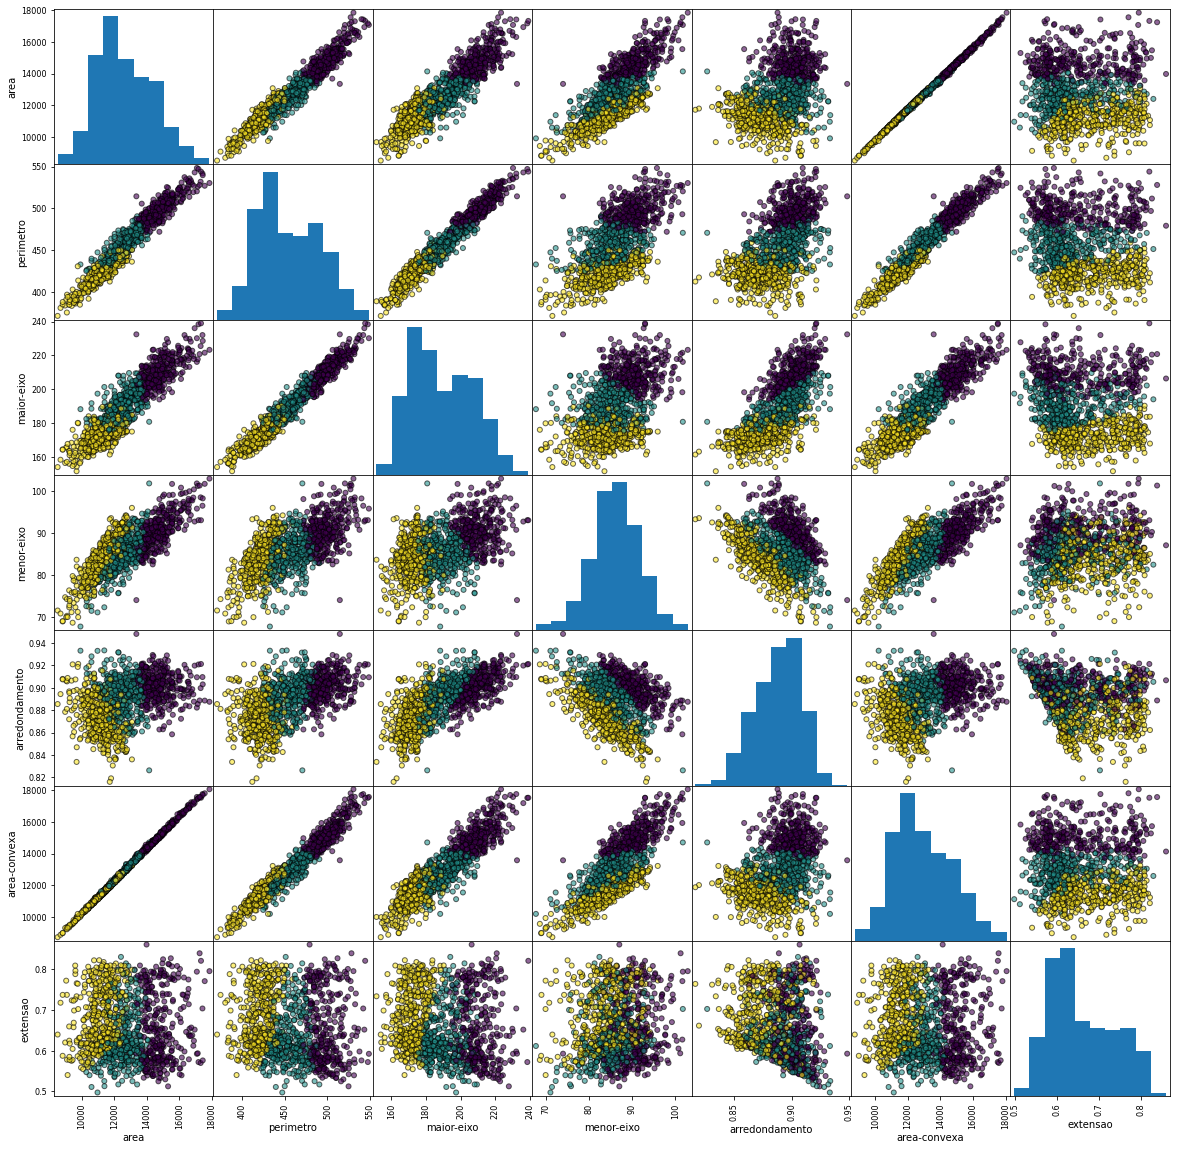

In [52]:

kmeans = cluster.MiniBatchKMeans( n_clusters=3, batch_size=10)
y_kmeans = kmeans.fit_predict(x_norm)


pd.plotting.scatter_matrix(df,marker="o", c=y_kmeans, s=25, edgecolor="k" , alpha=0.6,figsize=(20,20))
plt.show()

In [53]:
set(kmeans.labels_)

{0, 1, 2}

#### Describe, separando de acordo com as classificações

De acordo com os resultados obtidos, conseguimos identificar 3 classes: curto(2), médio(1), longo(0). O modelo não conseguiu distinguir entre Longo fino e longo. Essas classificações foram retiradas do seguinte artigo:


https://www.embrapa.br/busca-de-publicacoes/-/publicacao/212774/qualidade-de-graos-e-padroes-de-classificacao-de-arroz#:~:text=De%20maneira%20geral%2C%20a%20qualidade,produto%20aos%20padr%C3%B5es%20de%20comercializa%C3%A7%C3%A3o.

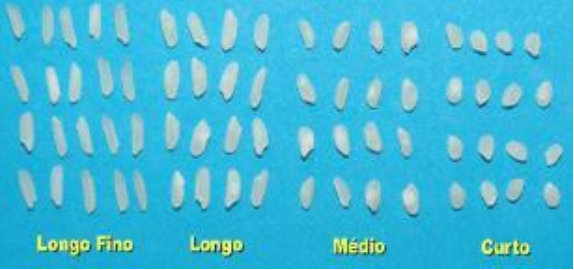

In [54]:
df_copy = df.copy()
df_copy['kmeans'] = kmeans.labels_
df_copy.groupby((['kmeans'])).describe().transpose()

kmeans                           0             1             2
area           count    337.000000    364.000000    442.000000
               mean   14847.086053  12490.392857  11129.287330
               std      910.618894    778.417995    851.205615
               min    13245.000000   9908.000000   8501.000000
               25%    14159.000000  11981.750000  10652.500000
               50%    14709.000000  12564.500000  11184.500000
               75%    15326.000000  13065.500000  11702.500000
               max    17856.000000  14142.000000  13088.000000
perimetro      count    337.000000    364.000000    442.000000
               mean     499.273318    454.873495    420.052292
               std       15.837353     14.982928     14.504479
               min      471.713989    422.768005    371.024994
               25%      487.252991    442.289513    411.234238
               50%      496.903992    454.865005    421.054001
               75%      509.304993    466.899498    430.225990
               max      548.445984    490.559998    458.894012
maior-eixo     count    337.000000    364.000000    442.000000
               mean     210.557349    190.023991    171.852994
               std        8.444269      7.930342      6.422850
               min      193.516724    175.306442    151.438461
               25%      204.482956    183.210846    167.885578
               50%      209.334274    189.528381    171.853844
               75%      216.159988    195.852146    175.846416
               max      239.010498    209.585968    190.213318
menor-eixo     count    337.000000    364.000000    442.000000
               mean      90.921423     84.820478     83.532392
               std        4.214977      4.518015      5.104141
               min       73.986763     67.695343     68.607536
               25%       88.178268     82.128389     80.428881
               50%       90.816139     84.922974     83.907818
               75%       93.183220     87.791996     86.927710
               max      102.901276    101.762260     95.941948
arredondamento count    337.000000    364.000000    442.000000
               mean       0.901134      0.893678      0.872895
               std        0.012857      0.016124      0.017594
               min        0.858497      0.826348      0.816083
               25%        0.892898      0.883425      0.860851
               50%        0.901328      0.894789      0.872723
               75%        0.909836      0.904614      0.884975
               max        0.948007      0.933314      0.921269
area-convexa   count    337.000000    364.000000    442.000000
               mean   15187.448071  12781.379121  11371.764706
               std      916.826302    806.405061    861.351016
               min    13536.000000  10205.000000   8738.000000
               25%    14448.000000  12248.500000  10874.500000
               50%    15013.000000  12843.500000  11413.500000
               75%    15631.000000  13393.000000  11936.250000
               max    18062.000000  14709.000000  13372.000000
extensao       count    337.000000    364.000000    442.000000
               mean       0.656709      0.627714      0.685690
               std        0.085901      0.063675      0.070965
               min        0.512506      0.497413      0.540267
               25%        0.581548      0.583830      0.623599
               50%        0.637907      0.612358      0.675154
               75%        0.735648      0.661932      0.746874
               max        0.861050      0.830688      0.822576

## Optics

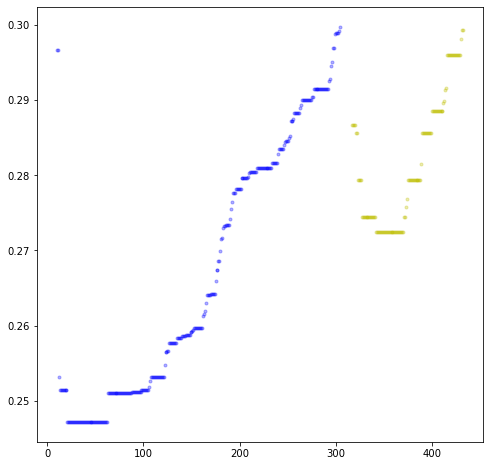

{0, 1, -1}


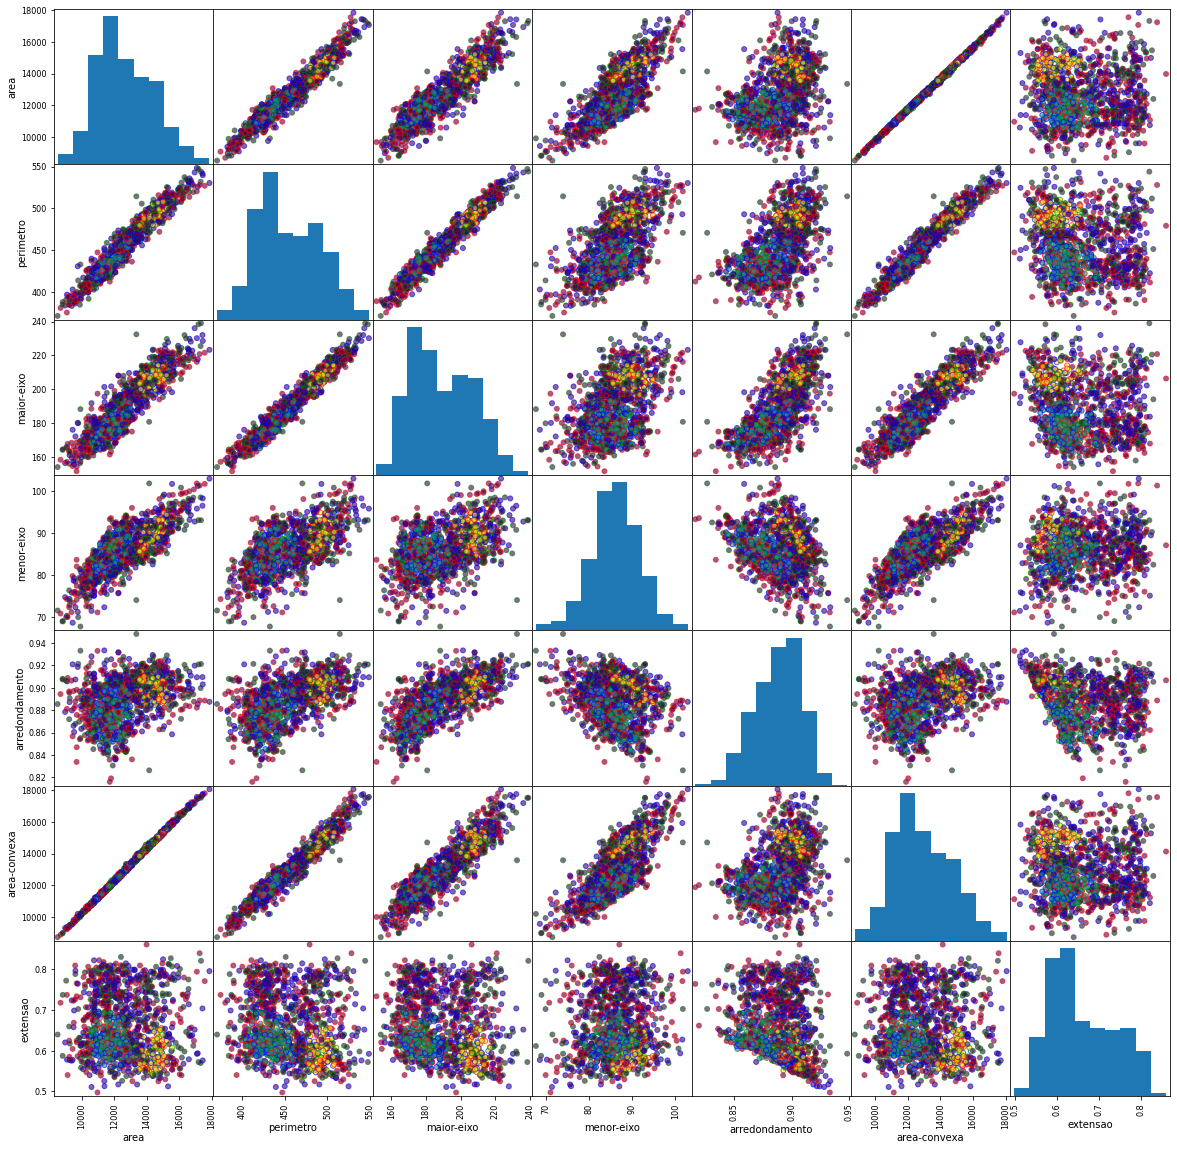

In [55]:
modelo = cluster.OPTICS( 
    min_samples=50, max_eps=0.3, 
    xi=0.0007
    
)
y_predito = modelo.fit_predict(x_norm)

#####
space = np.arange(len(x_norm))
reachability = modelo.reachability_[ modelo.ordering_ ]
labels = modelo.labels_[ modelo.ordering_ ]

plt.figure(figsize=(8,8))
colors = [ "b.", "y.", "r.", "g.", "c." ]
for klass, color in zip( range(0, 5), colors ):
  Xk = space[ labels == klass ]
  Rk = reachability[ labels==klass ]
  plt.plot(Xk, Rk, color, alpha=0.3)

plt.plot( space[ labels == -1 ], reachability[ labels==-1 ], "k.", alpha=0.6 )

plt.show()
print(set(modelo.labels_[ modelo.ordering_ ]))

########
pd.plotting.scatter_matrix(df,marker="o", c=y_predito, s=25, edgecolor=['r','g','b'], alpha=0.6,figsize=(20,20))
plt.show()

In [56]:
set(modelo.labels_)

{-1, 0, 1}

#### Describe 

In [58]:
df_copy.drop(columns=['kmeans'],inplace=True)
df_copy['optics'] = modelo.labels_
df_copy.groupby((['optics'])).describe().transpose()

optics                          -1             0             1
area           count    730.000000    296.000000    117.000000
               mean   12780.012329  11672.442568  14398.837607
               std     1917.624261    621.976780    494.716132
               min     8501.000000  10386.000000  13277.000000
               25%    11322.000000  11186.250000  13990.000000
               50%    12723.000000  11684.000000  14436.000000
               75%    14039.500000  12142.000000  14768.000000
               max    17856.000000  12988.000000  15556.000000
perimetro      count    730.000000    296.000000    117.000000
               mean     457.559435    432.231591    491.737052
               std       38.459315     13.744976      8.710503
               min      371.024994    402.834015    473.898987
               25%      425.908005    421.473991    484.881989
               50%      459.552505    432.349991    491.707001
               75%      485.628258    441.730255    498.299011
               max      548.445984    462.802002    510.510010
maior-eixo     count    730.000000    296.000000    117.000000
               mean     191.032426    177.213366    206.638937
               std       18.640909      7.287796      4.554442
               min      151.438461    162.625137    196.225555
               25%      175.251812    171.344280    203.444870
               50%      191.463676    176.391235    206.657425
               75%      204.803123    182.663116    209.679321
               max      239.010498    192.994797    217.102234
menor-eixo     count    730.000000    296.000000    117.000000
               mean      85.970250     85.005165     89.886149
               std        6.521006      2.926787      2.350797
               min       67.695343     78.457436     84.300430
               25%       81.680698     82.663504     88.111778
               50%       85.886227     85.079662     90.244980
               75%       91.039377     87.034721     91.475899
               max      102.901276     91.473282     94.857040
arredondamento count    730.000000    296.000000    117.000000
               mean       0.890460      0.876498      0.900182
               std        0.021292      0.014219      0.007232
               min        0.816083      0.844204      0.884407
               25%        0.876652      0.865092      0.894185
               50%        0.893165      0.876967      0.900171
               75%        0.906149      0.887441      0.905737
               max        0.948007      0.907925      0.914930
area-convexa   count    730.000000    296.000000    117.000000
               mean   13070.016438  11929.699324  14740.247863
               std     1961.352348    632.671008    490.779340
               min     8738.000000  10647.000000  13765.000000
               25%    11561.000000  11447.500000  14315.000000
               50%    13040.500000  11933.500000  14772.000000
               75%    14396.250000  12392.500000  15114.000000
               max    18062.000000  13302.000000  15862.000000
extensao       count    730.000000    296.000000    117.000000
               mean       0.684196      0.622423      0.591223
               std        0.083588      0.030073      0.027500
               min        0.497413      0.560027      0.541860
               25%        0.611898      0.601595      0.572135
               50%        0.694716      0.618159      0.584008
               75%        0.757363      0.640629      0.609297
               max        0.861050      0.706936      0.656158

## DBScan

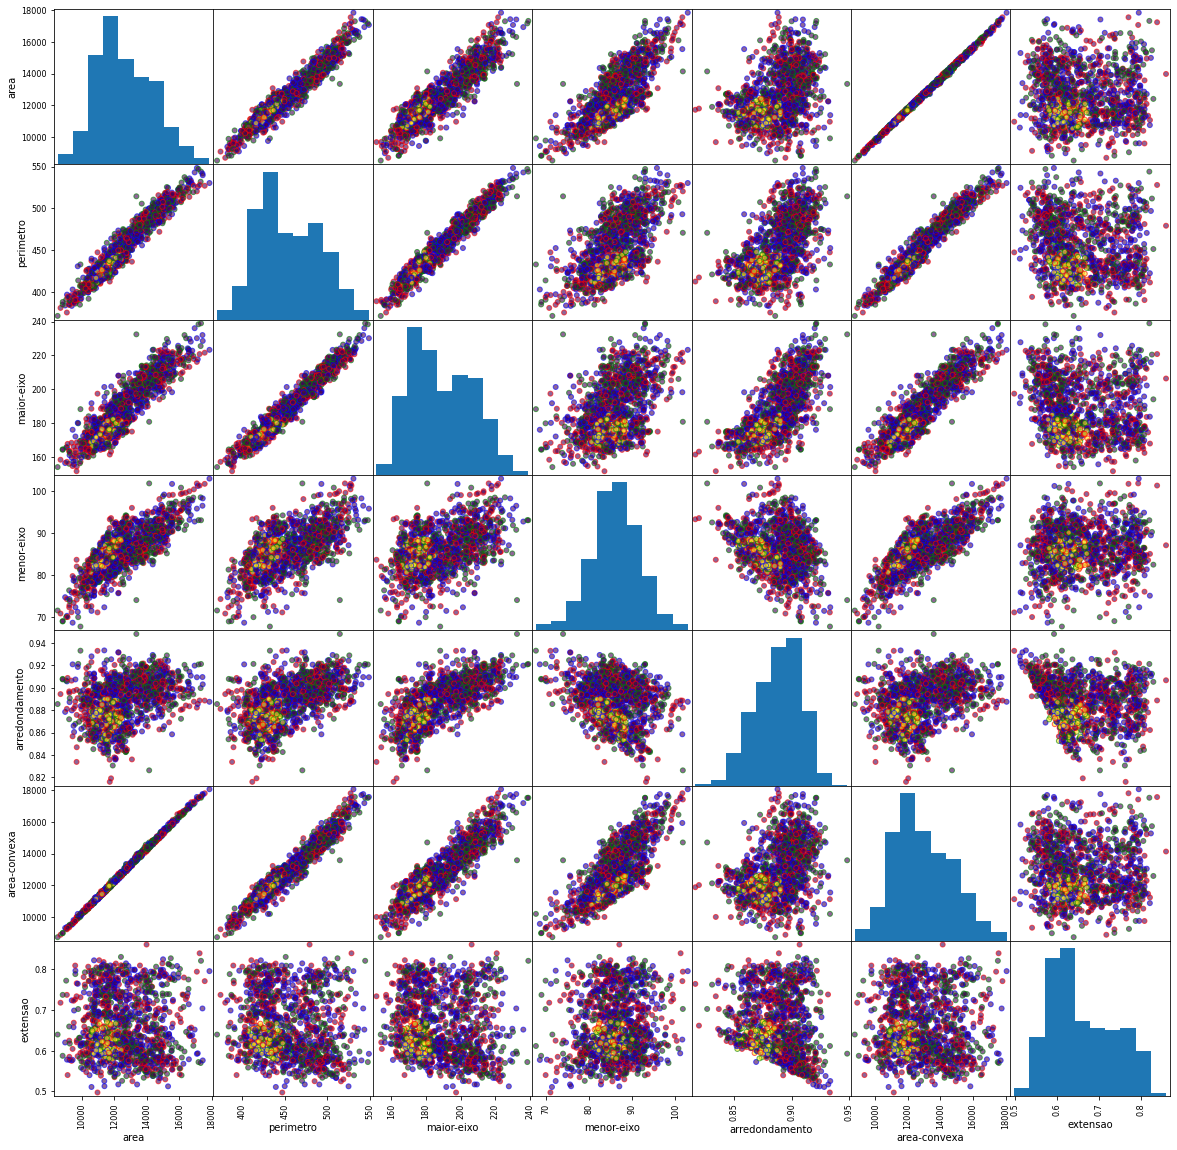

In [72]:
modelo = cluster.DBSCAN( eps=0.26, min_samples=50)

y_predito = modelo.fit_predict(x_norm)


pd.plotting.scatter_matrix(df,marker="o", c=y_predito, s=25, edgecolor=['r','g','b'], alpha=0.6,figsize=(20,20))
plt.show()

In [73]:
set(modelo.labels_)

{-1, 0}